
=== Basic Statistics ===
         GrLivArea  BedroomAbvGr    TotalBath      SalePrice
count  1460.000000   1460.000000  1460.000000    1460.000000
mean   1515.463699      2.866438     1.756507  180921.195890
std     525.480383      0.815778     0.636015   79442.502883
min     334.000000      0.000000     0.000000   34900.000000
25%    1129.500000      2.000000     1.000000  129975.000000
50%    1464.000000      3.000000     2.000000  163000.000000
75%    1776.750000      3.000000     2.500000  214000.000000
max    5642.000000      8.000000     3.500000  755000.000000


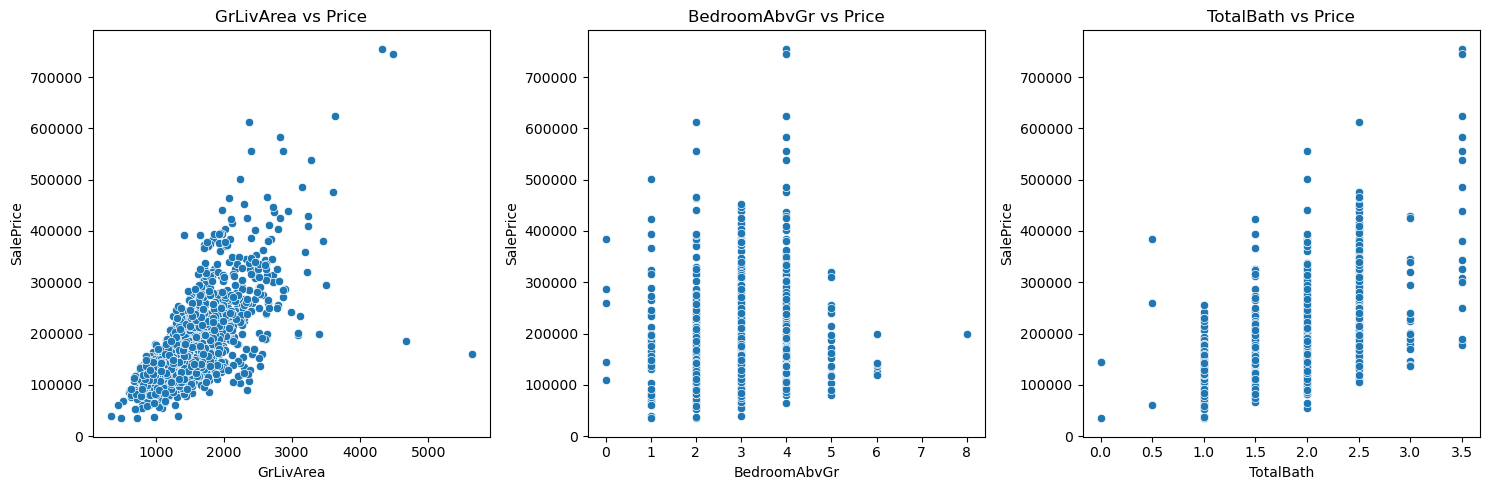

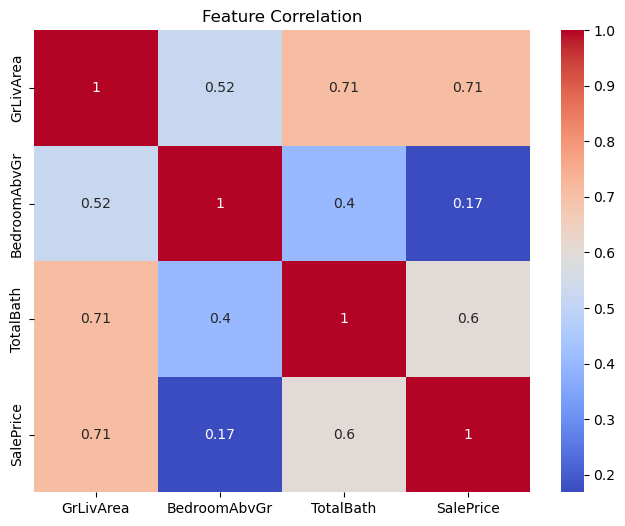


=== Model Performance ===
RMSE: $53,371.56
R-squared: 0.629

=== Coefficients ===
GrLivArea: $100.64 per unit
BedroomAbvGr: $-26,645.53 per unit
TotalBath: $27,083.21 per unit
Base Price: $56,862.58

Predicted price for 2000 sqft, 3 bed, 2.5 bath: $245,907.79


C:\Users\Mohammad Rihan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [5]:
# House Price Prediction - Complete Working Code
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_path=r"C:\Users\Mohammad Rihan\Downloads\task_1_data.xlsx"
data = pd.read_excel(file_path)


# ======================
# 2. Data Preparation
# ======================
# Select relevant features
df = data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']].copy()

# Create total bathrooms
df['TotalBath'] = df['FullBath'] + df['HalfBath'] * 0.5

# Remove rows with missing values
df = df.dropna()

# Final features
features = ['GrLivArea', 'BedroomAbvGr', 'TotalBath']
target = 'SalePrice'

# ======================
# 3. EDA (Exploratory Data Analysis)
# ======================
print("\n=== Basic Statistics ===")
print(df[features + [target]].describe())

plt.figure(figsize=(15, 5))
for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x=col, y=target)
    plt.title(f'{col} vs Price')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[features + [target]].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# ======================
# 4. Model Training
# ======================
# Split data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# ======================
# 5. Evaluation
# ======================
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n=== Model Performance ===")
print(f"RMSE: ${rmse:,.2f}")
print(f"R-squared: {r2:.3f}")

print("\n=== Coefficients ===")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: ${coef:,.2f} per unit")
print(f"Base Price: ${model.intercept_:,.2f}")

# ======================
# 6. Prediction Example
# ======================
example_house = [[2000, 3, 2.5]]  # 2000 sqft, 3 bed, 2.5 bath
predicted_price = model.predict(example_house)
print(f"\nPredicted price for 2000 sqft, 3 bed, 2.5 bath: ${predicted_price[0]:,.2f}")